<a href="https://colab.research.google.com/github/tomholmes96/ca-portfolio-opti/blob/main/Buffettology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook I want to implement some of Warren Buffett's strategies for choosing stocks as detailed in the book "Buffettology". 

**Need to install Yahoo Finance as it isn't already on Colab**

In [16]:
!pip install yfinance

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Basic Financials

A preview of the info provided for a stock from the yfinance API

In [18]:
aapl = yf.Ticker('AAPL')
aapl.info

{'52WeekChange': 0.7703804,
 'SandP52WeekChange': 0.15703821,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 130.15,
 'askSize': 1200,
 'averageDailyVolume10Day': 110244000,
 'averageVolume': 114195037,
 'averageVolume10days': 110244000,
 'beta': 1.297637,
 'beta3Year': None,
 'bid': 130.1,
 'bidSize': 1300,
 'bookValue': 3.849,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1607990400,
 'dayHigh': 133.6116,
 'dayLow': 129.4,
 'dividendRate': 0.82,
 'dividendYield': 0.0062,
 'earningsQuarterlyGrowth': -0.074,
 'enterpriseToEbitda': 29.573,
 'enterpriseToRevenue': 8.332,
 'enterpriseValue': 2287304179712,
 'exDividendDate': 1604620800,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'expireDate': None,
 'fiftyDayAverage': 124.211876,
 

Function for returning the rate of return for a stock factoring in how much I would pay for it:

$$ RoR = \frac{Foward EPS}{Ask Price} $$



In [19]:
def get_ror_of_asset(stock):
    #eps = stock_info['netIncomeToCommon'] / stock_info['sharesOutstanding']]
    eps = stock['forwardEps']
    ask = stock['ask']
    ror = (eps / ask) * 100
    print('Annual Rate of Return for ' + stock['shortName'] + ' is: %.2f' % ror + '%')
    return ror

My Portfolio

In [20]:
us_stock_symbols = ['NOK', 'MSFT', 'AMZN', 'AAPL', 'GOOGL', 'FB', 'NVDA', 'MCD', 'NFLX', 'PYPL', 'SQ', 
                    'TSLA', 'AU', 'GOLD', 'PAAS', 'AUY', 'SNE', 'EA', 'TTWO', 'ATVI', 'SPOT', 'BA', 'MA', 'V', 'CME',]
uk_stock_symbols = ['BARC.L', 'EZJ.L', 'AZN.L']
etf_symbols = ['SGLN.L', 'VWRL.L', 'VFEM.L', 'VUSA.L', 'PHSP.L']
all_symbols = us_stock_symbols + uk_stock_symbols + etf_symbols
tickers = yf.Tickers(us_stock_symbols)

For syntax reasons the UK and US stocks need to be iterated through separately.

In [21]:
# To store stock data in lists
us_assets = []
uk_assets = []
all_rors_of_assets = []

# For the US Stocks
for asset in us_stock_symbols:
    stock_info = getattr(tickers.tickers, asset).info
    us_assets += [stock_info]
    new_ror = get_ror_of_asset(stock_info)
    all_rors_of_assets += [new_ror]

# For the UK Stocks
for asset in uk_stock_symbols:
    stock_info = yf.Ticker(asset).info
    uk_assets += [stock_info]
    new_ror = get_ror_of_asset(stock_info)
    all_rors_of_assets += [new_ror]


Annual Rate of Return for Nokia Corporation Sponsored is: 6.38%
Annual Rate of Return for Microsoft Corporation is: 3.42%
Annual Rate of Return for Amazon.com, Inc. is: 1.42%
Annual Rate of Return for Apple Inc. is: 3.34%
Annual Rate of Return for Alphabet Inc. is: 3.54%
Annual Rate of Return for Facebook, Inc. is: 3.90%
Annual Rate of Return for NVIDIA Corporation is: 2.18%
Annual Rate of Return for McDonald's Corporation is: 3.98%
Annual Rate of Return for Netflix, Inc. is: 1.73%
Annual Rate of Return for PayPal Holdings, Inc. is: 1.94%
Annual Rate of Return for Square, Inc. is: 0.51%
Annual Rate of Return for Tesla, Inc. is: 0.53%
Annual Rate of Return for AngloGold Ashanti Limited is: 12.84%
Annual Rate of Return for Barrick Gold Corporation is: 5.88%
Annual Rate of Return for Pan American Silver Corp. is: 6.91%
Annual Rate of Return for Yamana Gold Inc. is: 3.15%
Annual Rate of Return for Sony Corporation is: 4.46%
Annual Rate of Return for Electronic Arts Inc. is: 4.27%
Annual Ra

I work in dark mode so I set the graph font to white:

In [22]:
COLOR = 'white'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


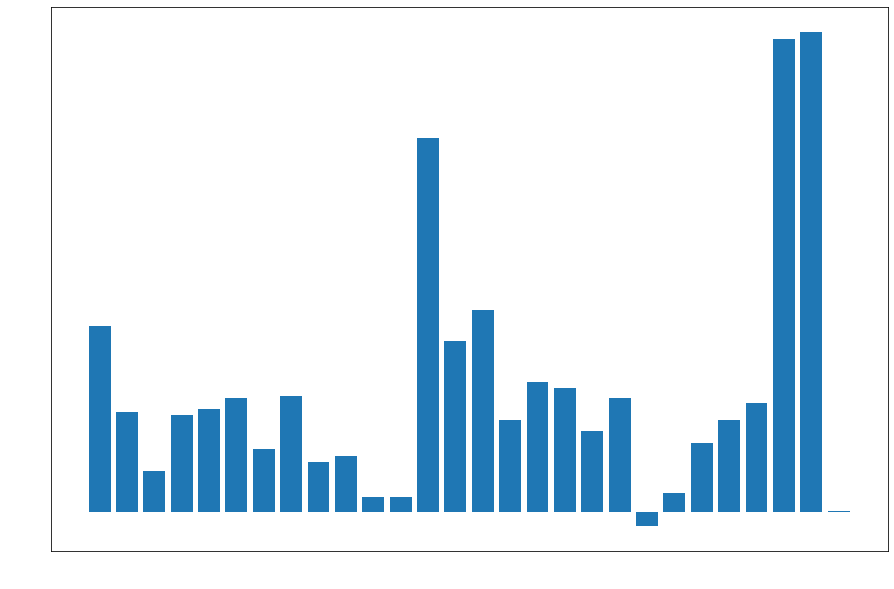

In [23]:
plt.figure(figsize=(15,10))
plt.bar(us_stock_symbols + uk_stock_symbols, all_rors_of_assets)
ax = plt.subplot()
ax.set_xlabel('Stock')
ax.set_ylabel('Annual Rate of Return');

**Percentage 52-Week Change - Volitility**

In [29]:
annual_change = []
annual_change_sp500 = us_assets[0]['SandP52WeekChange']
annual_change_sp500_points = [ annual_change_sp500 for p in us_assets + uk_assets ]
us_annual_change = []
uk_annual_change = []
us_annual_change_sp500 = []
uk_annual_change_sp500 = []

for asset in us_assets:
    year_change = asset['52WeekChange']
    us_annual_change += [year_change]

us_stock_count = len(us_assets)
annual_change += us_annual_change[:us_stock_count]

for asset in uk_assets:
    year_change = asset['52WeekChange']
    uk_annual_change += [year_change]

uk_stock_count = len(uk_assets)
annual_change += uk_annual_change[:uk_stock_count]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


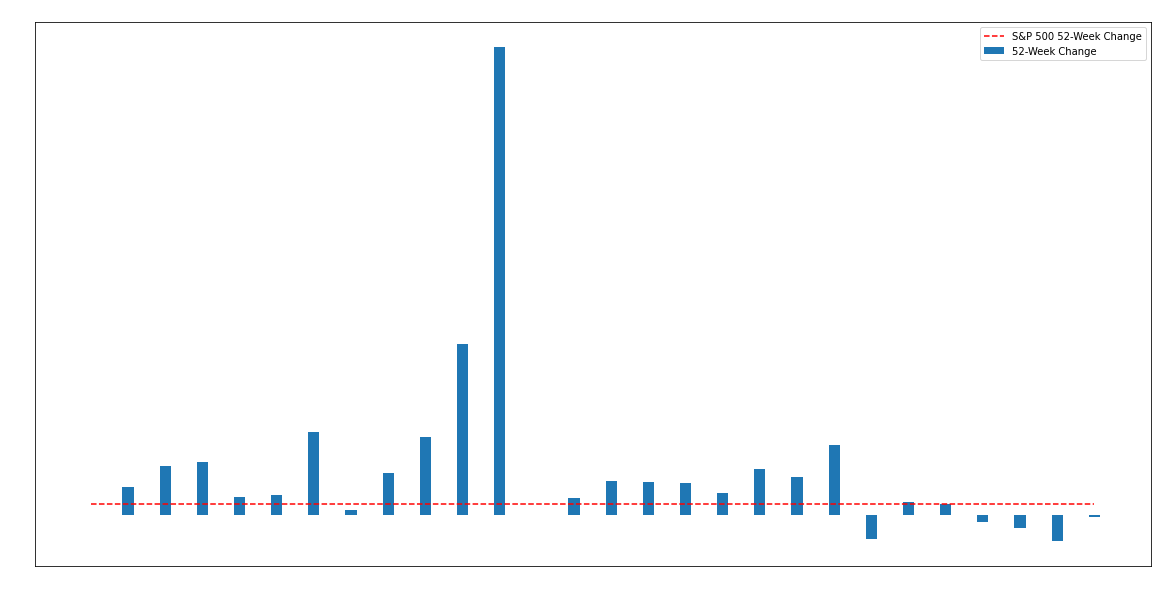

In [30]:
plt.figure(figsize=(20,10))
plt.title('52-Week Change vs S&P 500 52-Week Change', fontdict={'color':'white'})
ax = plt.subplot()
w = 0.3
ax.bar(us_stock_symbols + uk_stock_symbols, annual_change, width=w, align='center')
ax.plot(annual_change_sp500_points, linestyle='dashed', color='red')
ax.set_xlabel('Stock')
ax.set_ylabel('52-week Change')
plt.legend(['S&P 500 52-Week Change', '52-Week Change']);

# Return vs 52-Week Change

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


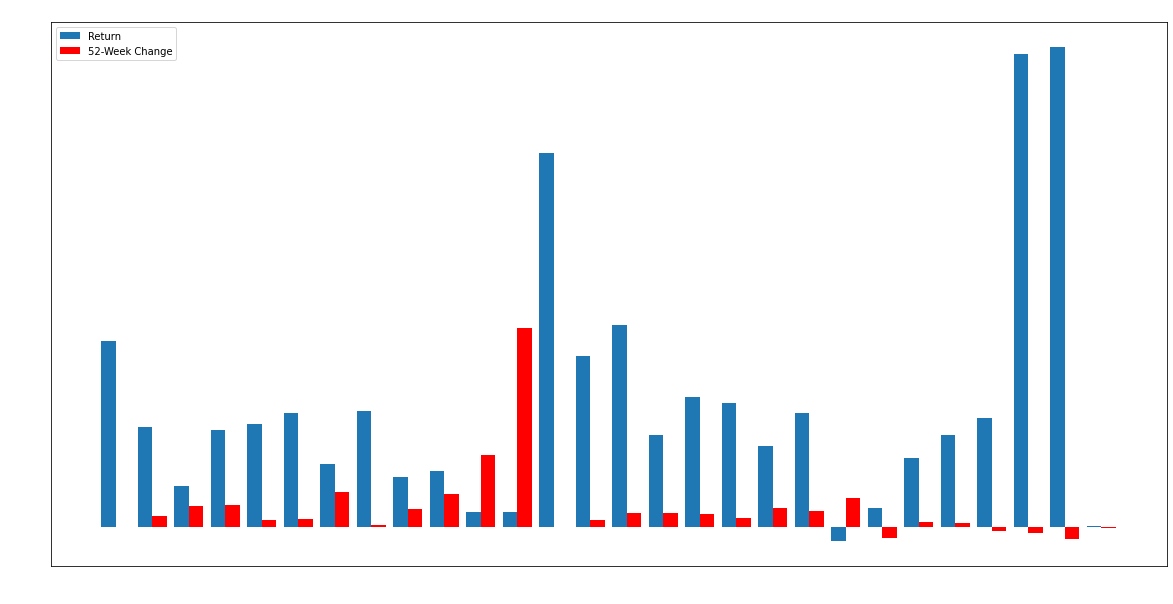

In [31]:
X = np.arange(len(us_stock_symbols + uk_stock_symbols))

plt.figure(figsize=(20,10))
plt.title('52-Week Change vs Return', fontdict={'color':'white'})
plt.xticks(X, us_stock_symbols + uk_stock_symbols)

ax = plt.subplot()
w = 0.4
ax.bar(X - w/2, all_rors_of_assets, width=w, align='center')
ax.bar(X + w/2, annual_change, width=w, align='center', color='r')
ax.set_xlabel('Stock')
ax.set_ylabel('52-week Change')

plt.legend(['Return', '52-Week Change']);